## Importing necessary libraries and data loading

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [33]:
data.shape

(7352, 563)

## PCA

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-2])

In [42]:
# Initialize PCA, let's say we want to reduce the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Convert to DataFrame for better readability
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [43]:
# Show the transformed data
print(principal_df)

            PC1        PC2
0    -16.138544   2.152024
1    -15.296194   1.387144
2    -15.137019   2.473351
3    -15.350884   3.915681
4    -15.544814   4.598737
...         ...        ...
7347  15.465060 -12.536306
7348  14.222722 -10.253501
7349  14.333436 -12.260712
7350  12.876019 -14.071256
7351  13.016104 -12.244261

[7352 rows x 2 columns]


In [44]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.50781172 0.0658068 ]


In [45]:
# Fit PCA to get all components
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

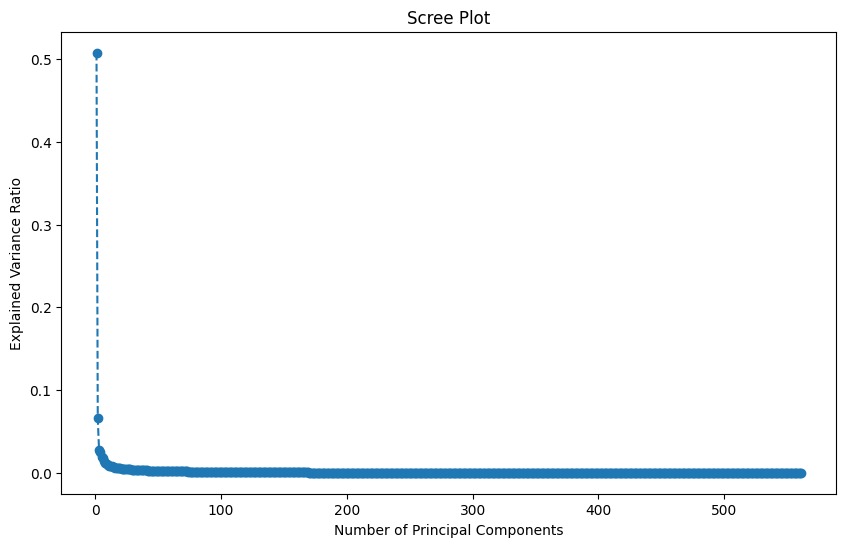

In [46]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [49]:
# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components needed for 90% variance
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.80) + 1
print(f"Number of components needed to retain 90% variance: {num_components}")

Number of components needed to retain 90% variance: 26


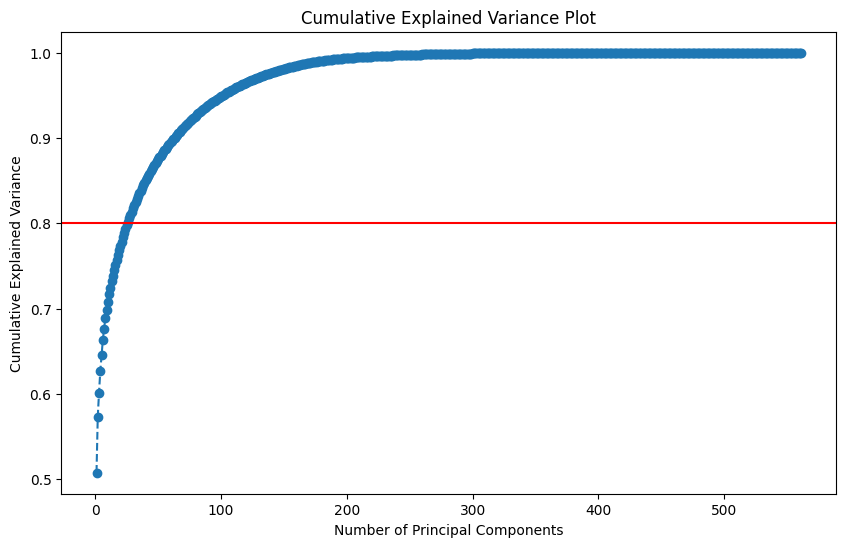

In [51]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

In [53]:
# Fit PCA with at least 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_scaled)

# Convert the principal components to a DataFrame for easier inspection
import pandas as pd
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Display the first few rows of the first five principal components
print(principal_df.head())

         PC1       PC2       PC3       PC4       PC5
0 -16.138544  2.152024 -3.144780  0.272464 -6.798938
1 -15.296194  1.387144  0.682221 -2.813677 -4.266170
2 -15.137019  2.473351  1.756641 -3.717974 -4.181557
3 -15.350884  3.915681  1.790322 -2.567521 -3.205840
4 -15.544814  4.598737  2.188582 -2.897578 -3.080150


In [54]:
principal_components.shape

(7352, 5)

In [60]:
# Create a DataFrame with component loadings (eigenvectors)
# Rows represent principal components, and columns represent features
loadings = pd.DataFrame(pca.components_[:5], columns=data.columns[:-2], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

loadings = loadings.T

loadings

,PC1,PC2,PC3,PC4,PC5
tBodyAcc-mean()-X,0.000028,0.015638,0.032482,-0.013609,-0.003114
tBodyAcc-mean()-Y,-0.002473,-0.000080,-0.002695,-0.001147,-0.012960
tBodyAcc-mean()-Z,-0.001527,-0.004052,-0.010167,0.008681,-0.005127
tBodyAcc-std()-X,0.056213,-0.011165,0.027241,0.048379,-0.006130
tBodyAcc-std()-Y,0.056788,-0.025959,0.023044,0.014119,0.015845
...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.001014,0.012141,0.004326,0.012749,-0.018253
"angle(tBodyGyroJerkMean,gravityMean)",-0.001582,-0.008723,-0.004641,-0.004192,0.010679
"angle(X,gravityMean)",-0.023100,0.017476,-0.107508,0.118799,0.167569
"angle(Y,gravityMean)",0.029719,-0.035213,0.080053,-0.102789,-0.131835


In [65]:
# Eigenvalues (amount of variance explained by each principal component)
eigenvalues = pca.explained_variance_

# Display eigenvalues for each principal component
print("Eigenvalues for each principal component:")
for i, eigenvalue in enumerate(eigenvalues, 1):
    print(f"PC{i}: {eigenvalue}")

Eigenvalues for each principal component:
PC1: 284.9211307884459
PC2: 36.92263841847637
PC3: 15.74625207072205
PC4: 14.049085822383574
PC5: 10.594719999082438


In [66]:
e_value = 284.9211307884459

Correlation of PC-1 with variables

In [78]:
correlation = []
for i in range(561):
    correlation.append(loadings.iloc[i, 0] * np.sqrt(e_value))

In [104]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(correlation) if value > 0.95]

# Display the result
len(indexes)

66

In [105]:
data.columns[indexes]

Index(['tBodyAcc-std()-Y', 'tBodyAcc-sma()', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X',
       'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-sma()',
       'tBodyAccJerk-iqr()-X', 'tBodyGyro-sma()', 'tBodyGyroJerk-std()-Z',
       'tBodyGyroJerk-mad()-Z', 'tBodyGyroJerk-sma()', 'tBodyGyroJerk-iqr()-Z',
       'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-max()',
       'tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-max()', 'tGravityAccMag-sma()',
       'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()',
       'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()',
       'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-iqr()', 'tBodyGyroMag-mean()',
       'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-mean()',
       'tBodyGyroJerkMag-sma()', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y',
       'fBodyAcc-mean()-Z', 'fBodyAcc-mad()-X', 'fBodyAcc-mad()-Y',
       'fBodyAcc-sma()'

To analyze what columns these are!!!

In [98]:
# Assuming 'Activity' is a column in the original 'data' DataFrame
principal_df['Activity'] = data['Activity']

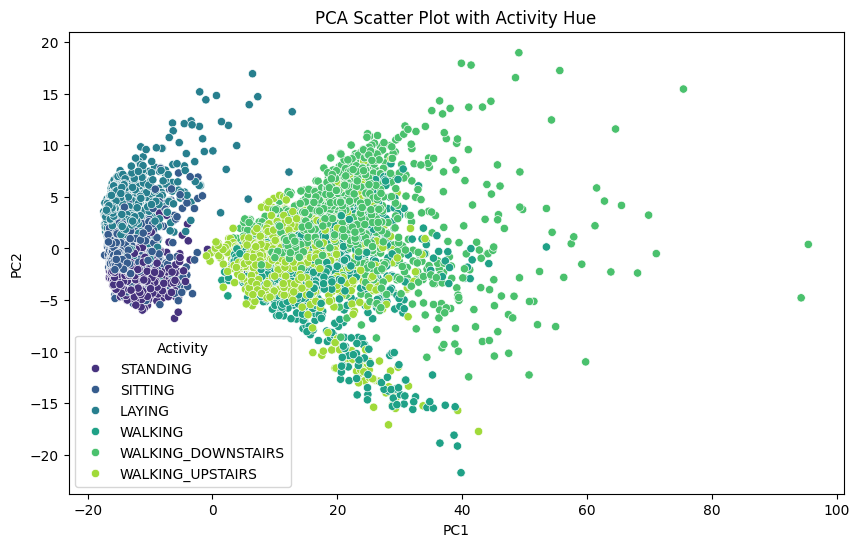

In [107]:
# Plot using seaborn with hue based on 'Activity' column
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df.iloc[:, 0], y=principal_df.iloc[:, 3], hue=principal_df['Activity'], palette='viridis')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Activity Hue')
plt.legend(title='Activity')
plt.show()

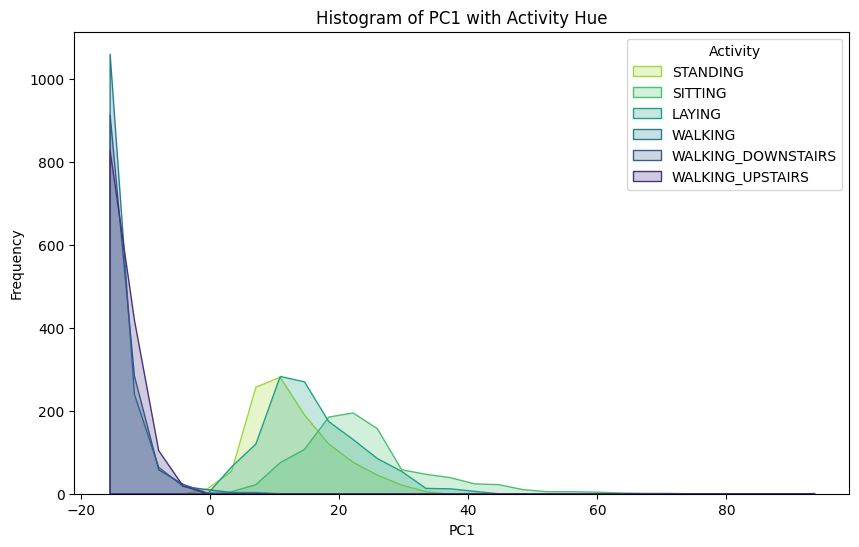

In [130]:
# Create a long-form DataFrame with 'PC1' and 'Activity'
long_df = pd.DataFrame({
    'PC1': principal_df.iloc[:, 0],
    'Activity': principal_df['Activity']
})


plt.figure(figsize=(10, 6))
sns.histplot(long_df, x='PC1', hue='Activity', bins=30, palette='viridis', element='poly')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Histogram of PC1 with Activity Hue')

# Explicitly set legend labels
plt.legend(title='Activity', labels=long_df['Activity'].unique())

plt.show()

## Factor Analysis

In [140]:
from sklearn.decomposition import FactorAnalysis

# Initialize FactorAnalysis with the number of components (factors)
fa = FactorAnalysis(n_components=3, random_state=65, rotation='varimax')

# Fit the model and transform the data into the factors
factors = fa.fit_transform(data_scaled)

In [141]:
# Get the factor loadings
loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor{i+1}' for i in range(fa.n_components)], index=data.columns[:-2])

# Display the loadings
print("Factor Loadings:")
print(loadings)

Factor Loadings:
                                       Factor1   Factor2   Factor3
tBodyAcc-mean()-X                     0.006604  0.012140 -0.111433
tBodyAcc-mean()-Y                    -0.044748  0.006987 -0.010545
tBodyAcc-mean()-Z                    -0.024371 -0.020701  0.005830
tBodyAcc-std()-X                      0.978458 -0.130049 -0.015277
tBodyAcc-std()-Y                      0.960310 -0.031065  0.184565
...                                        ...       ...       ...
angle(tBodyGyroMean,gravityMean)      0.020010  0.015629 -0.092513
angle(tBodyGyroJerkMean,gravityMean) -0.028677 -0.014186  0.059655
angle(X,gravityMean)                 -0.387459  0.032019 -0.073815
angle(Y,gravityMean)                  0.492812 -0.038650  0.192610
angle(Z,gravityMean)                  0.426202  0.082092  0.184042

[561 rows x 3 columns]


<Axes: xlabel='Factor1', ylabel='Count'>

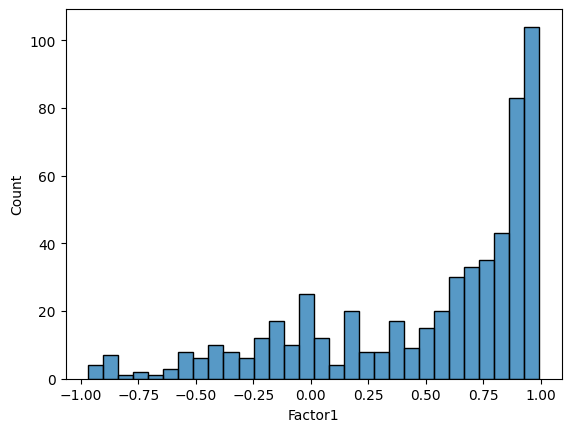

In [144]:
sns.histplot(loadings.iloc[:, 0], bins=30)

In [148]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(list(loadings.iloc[:, 0])) if value > 0.95]

# Display the result
len(indexes)

73